# Minecraft: What kinds of players spend time on the server?
This project looks at different players and their playtimes to see what kind of players enjoy spending more time on a minecraft server compared to other types of players.


**Background:**
Minecraft is a videogame where many people can play together in a world at totally different times and can be enjoyed by many different ages. In this project we focus on people with different types of experiences (skill level) with the game, age and time played.


**Question:**

Can amount of Minecraft experience and age of a player predict the amount of playtime  in the players dataset?

**Data Description:**
The dataset used in this project is the players.csv dataset and the total number of observations (players) are 196. 

There are a total of 7 variables in the dataset.
The variables are
- experience: the type of experience with the game minecraft/skill level (character variable)
- subscribe: if the player has subscribed to the newsletter or not (logical variable)
- hashedEmail: emails of players that are hashed (character variable)
- played_hours: amount of hours played on the server (double variable)
- gender: gender of the player (character variable)
- Age: age of the player (double variable)

The data was collected from a Minecraft server set up by a group in Computer Science at UBC by recording play sessions of the players.

**Part 1: Wrangling our datasets**
Taking a look into both dataset given and wrangling them so they are tidy.  
Load our R packages

In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(forcats)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Reading our datasets**

In [3]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Focusing on the first player dataset, I want to select the variables that aligns to my question and goal.

In [4]:
players_select <- players|>
    select(experience, hashedEmail, played_hours, Age) |>
    filter(Age != "NA")|>
    filter(played_hours != 0.0)|>
    mutate(experience = as.factor(experience))
players_select

experience,hashedEmail,played_hours,Age
<fct>,<chr>,<dbl>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,21
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,21
Amateur,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,17
Veteran,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,23
Beginner,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,25
Amateur,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,22
Amateur,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,17


In [21]:
avg_playtime<- players_select|>
group_by(experience)|>
summarize(avg_play = median(played_hours))
avg_playtime
experience_count<- players_select|>
group_by(experience)|>
summarize(count = n())
experience_count
no_time_played<- filter(players, played_hours == 0.0)
experience_count_none<- no_time_played|>
group_by(experience)|>
summarize(count = n())
experience_count_none

experience,avg_play
<fct>,<dbl>
Amateur,0.50
Beginner,0.80
Pro,0.55
Regular,0.60
Veteran,0.15


experience,count
<fct>,<int>
Amateur,35
Beginner,19
Pro,10
Regular,19
Veteran,26


experience,count
<chr>,<int>
Amateur,28
Beginner,16
Pro,3
Regular,16
Veteran,22


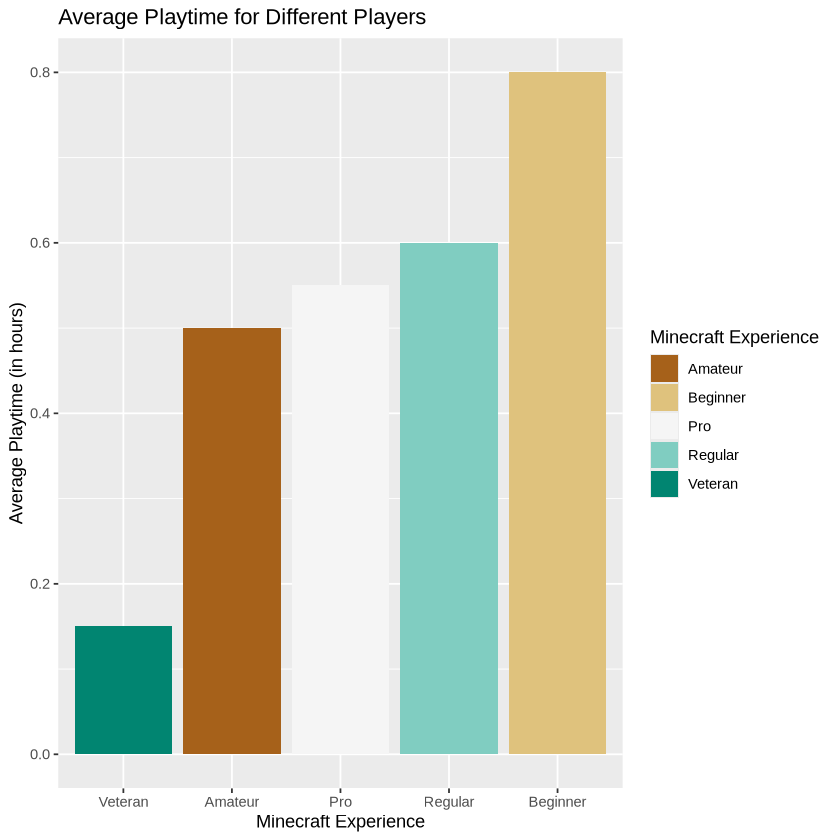

In [6]:
experience_bar<- avg_playtime |>
ggplot(aes(y = avg_play, x = fct_reorder(experience, avg_play), fill = experience))+
geom_bar(stat = "identity")+
labs(x = "Minecraft Experience", y = "Average Playtime (in hours)", fill = "Minecraft Experience") +
scale_fill_brewer(palette = "BrBG") +
ggtitle("Average Playtime for Different Players")
experience_bar

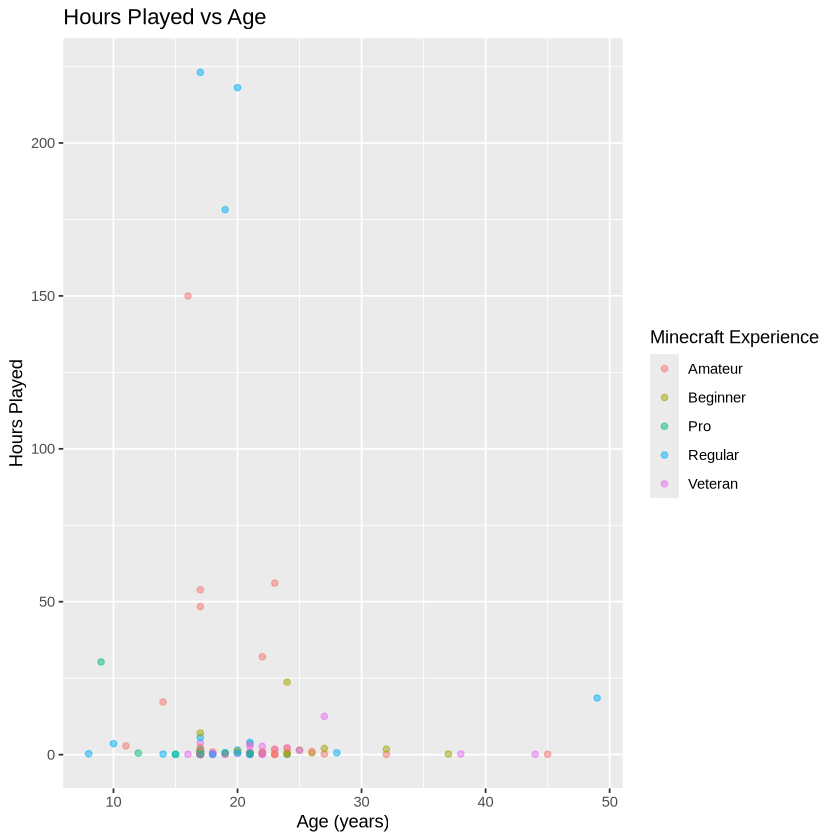

In [7]:
age_experience_plot<- players_select|>
ggplot(aes(x= Age, y = played_hours, colour = experience))+
    geom_point(alpha = 0.5)+
    labs(x= "Age (years)", y = "Hours Played", colour = "Minecraft Experience")+
    ggtitle("Hours Played vs Age")
age_experience_plot

In [8]:
set.seed(13)
players_split<- initial_split(players_select, prop = 0.75, strata = played_hours)
players_training<- training(players_split)
players_testing<- testing(players_split)

In [9]:
players_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ Age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

In [10]:
players_vfold<- vfold_cv(players_training, v = 5, strata = played_hours)
players_workflow<- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_knn)
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [11]:
gridvals <- tibble(neighbors = seq(from = 1, to = 51, by = 10))
players_results<- players_workflow|>
                    tune_grid(resamples = players_vfold, grid = gridvals)|>
                   collect_metrics()
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,50.21989268,5,6.18770950,Preprocessor1_Model1
1,rsq,standard,0.04842959,5,0.03624251,Preprocessor1_Model1
11,rmse,standard,32.83523235,5,6.92343613,Preprocessor1_Model2
11,rsq,standard,0.10536275,5,0.06588698,Preprocessor1_Model2
21,rmse,standard,33.77264901,5,7.35780523,Preprocessor1_Model3
21,rsq,standard,0.11841787,5,0.07173534,Preprocessor1_Model3
31,rmse,standard,33.93912390,5,7.62406975,Preprocessor1_Model4
31,rsq,standard,0.10232075,5,0.07066966,Preprocessor1_Model4
41,rmse,standard,33.02044148,5,7.61032023,Preprocessor1_Model5


In [12]:
players_min <- players_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
51,rmse,standard,32.29989,5,7.675151,Preprocessor1_Model6


In [13]:
k_min <- players_min |>
         pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,41.11982311
rsq,standard,0.04650671
mae,standard,17.90413165


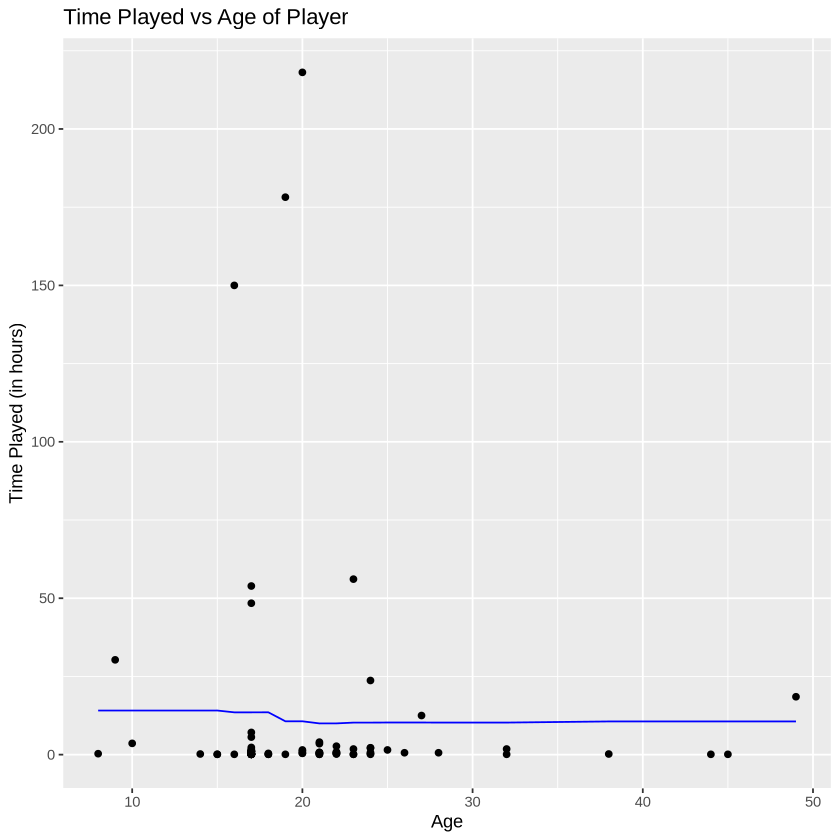

In [19]:
options(repr.plot.width = 7, repr.plot.height = 7)

# your code here
players_preds<- players_best_fit|>
    predict(players_training)|>
    bind_cols(players_training)

    players_plot<- ggplot(players_preds, aes(x = Age, y = played_hours))+
        geom_point()+
        geom_line(data = players_preds, mapping = aes(x = Age, y = .pred), color = "blue")+
        labs(x = "Age", y = "Time Played (in hours)")+
        ggtitle("Time Played vs Age of Player")
players_plot

In [15]:
new_player<- tibble(Age = 20)
predict(players_best_fit, new_player)
new_player_2<- tibble(Age = 7)
predict(players_best_fit, new_player_2)

.pred
<dbl>
10.66078


.pred
<dbl>
14.09608
